# Evaluating Logistic Regression Models - Lab

## Introduction

As we saw with KNN, we need alternative evaluation metrics to determine the effectiveness of classification algorithms. In regression, we were predicting values so it made sense to discuss error as a distance of how far off our estimates were. In classifying a binary variable however, we are either correct or incorrect. As a result, we tend to deconstruct this as how many false positives versus false negatives we come across.  
In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall and accuracy in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
* Understand and assess precision recall and accuracy of classifiers
* Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

![](./images/Precisionrecall.png)

At times, we may wish to tune a classification algorithm to optimize against precison or recall rather then overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is much preferable to optimize for recall, the number of cancer positive cases, then it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')

In [2]:
#Your code here
X = df.drop('target', axis = 1)
y = df['target']
X = X.fillna(value=0) #Fill null values
for col in X.columns:
    X[col] = (X[col]-min(X[col]))/ (max(X[col]) - min(X[col])) #We subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 2. Create a standard logistic regression model

In [5]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
#Your code here
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [6]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

## 3. Write a function to calculate the precision

In [7]:
def precision(y_hat, y):
    #Your code here
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    fp = sum([1 for i in y_y_hat if i[0]==0 and i[1]==1])
    return tp/float(tp+fp)

## 4. Write a function to calculate the recall

In [8]:
def recall(y_hat, y):
    #Your code here
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    fn = sum([1 for i in y_y_hat if i[0]==1 and i[1]==0])
    return tp/float(tp+fn)

## 5. Write a function to calculate the accuracy

In [9]:
def accuracy(y_hat, y):
    #Your code here
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    tn = sum([1 for i in y_y_hat if i[0]==0 and i[1]==0])
    return (tp+tn)/float(len(y_hat))

## 6. Calculate the precision, recall and accuracy of your classifier

Do this for both the train and the test set.

In [11]:
#Your code here
print('Training Precision: ', precision(y_hat_train, y_train))
print('Testing Precision: ', precision(y_hat_test, y_test))
print('\n\n')

print('Training Recall: ', recall(y_hat_train, y_train))
print('Testing Recall: ', recall(y_hat_test, y_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_hat_train, y_train))
print('Testing Accuracy: ', accuracy(y_hat_test, y_test))

Training Precision:  0.8449612403100775
Testing Precision:  0.8085106382978723



Training Recall:  0.8934426229508197
Testing Recall:  0.8837209302325582



Training Accuracy:  0.8546255506607929
Testing Accuracy:  0.8157894736842105


## 7. Comparing Precision Recall and Accuracy of Test vs Train Sets


Plot the precision, recall and accuracy for test and train splits using different train set sizes. What do you notice?

In [14]:
import matplotlib.pyplot  as plt
%matplotlib inline

In [15]:
training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i/100.0) #replace the "None" here
    logreg = LogisticRegression(fit_intercept = False, C = 1e12)
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

# 6 lines of code here
    training_Precision.append(precision(y_hat_train, y_train))
    testing_Precision.append(precision(y_hat_test, y_test))
    training_Recall.append(recall(y_hat_train, y_train))
    testing_Recall.append(recall(y_hat_test, y_test))
    training_Accuracy.append(accuracy(y_hat_train, y_train))
    testing_Accuracy.append(accuracy(y_hat_test, y_test))

Create 3 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, and testing and training accuracy in the third one.

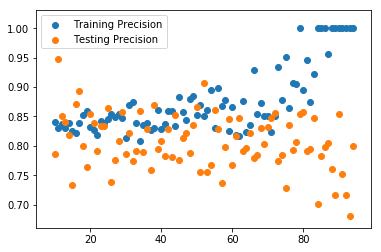

In [16]:
# code for test and train precision
plt.scatter(list(range(10,95)), training_Precision, label = 'Training Precision')
plt.scatter(list(range(10,95)), testing_Precision, label = 'Testing Precision')
plt.legend()
plt.show()

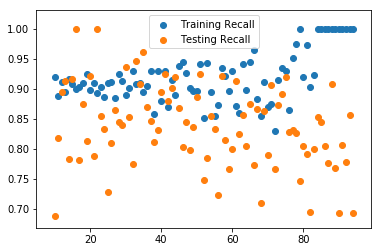

In [17]:
# code for test and train recall
plt.scatter(list(range(10,95)), training_Recall, label = 'Training Recall')
plt.scatter(list(range(10,95)), testing_Recall, label = 'Testing Recall')
plt.legend()
plt.show()

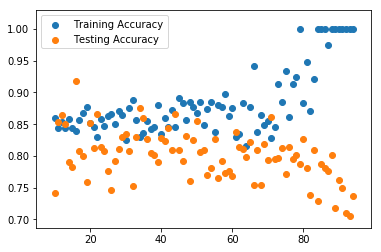

In [18]:
# code for test and train accuracy
plt.scatter(list(range(10,95)), training_Accuracy, label = 'Training Accuracy')
plt.scatter(list(range(10,95)), testing_Accuracy, label = 'Testing Accuracy')
plt.legend()
plt.show()

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.